### Health conditions among children under age 18 by selected characteristics United States


This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

**Feature description**:

**price** price in US dollars (\$326--\$18,823)This is the target column containing tags for the features. 

**The 4 Cs of Diamonds:-**

**carat (0.2--5.01)**
The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

**cut (Fair, Good, Very Good, Premium, Ideal)**
In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

**color, from J (worst) to D (best)**
The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

**clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**
Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

**Dimensions**

**x length in mm (0--10.74)**

**y width in mm (0--58.9)**

**z depth in mm (0--31.8)**

## Diamond Picture

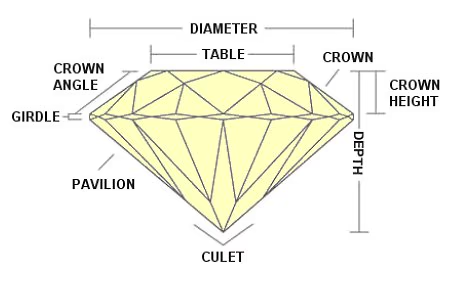




**depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)**
The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

**table width of the top of the diamond relative to widest point (43--95)**

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/diamonds.csv')
df.drop(columns='Unnamed: 0',inplace=True)

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
df.iloc[:,[0,1,2,3,4,5,7,8,9]]

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


# EDA

In [4]:
df.shape

(53940, 10)

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
df.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53775, 10)

In [9]:
cat_cols=[feat for feat in df.columns if df[feat].dtypes =='O']
num_cols=[feat for feat in df.columns if df[feat].dtypes !='O']


In [10]:
cat_cols,num_cols

(['cut', 'color', 'clarity'],
 ['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])

In [11]:
for i in cat_cols:
    print(f"In {i} feature I have unique values {df[i].nunique()}   ---------->  {df[i].unique()}\n  and each values have distribution of \n{df[i].value_counts()}")
    print('==='*34)
    

In cut feature I have unique values 5   ---------->  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
  and each values have distribution of 
cut
Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
Name: count, dtype: int64
In color feature I have unique values 7   ---------->  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
  and each values have distribution of 
color
G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: count, dtype: int64
In clarity feature I have unique values 8   ---------->  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
  and each values have distribution of 
clarity
SI1     13030
VS2     12225
SI2      9142
VS1      8155
VVS2     5056
VVS1     3646
IF       1784
I1        737
Name: count, dtype: int64


# Visualization

<Figure size 2000x900 with 0 Axes>

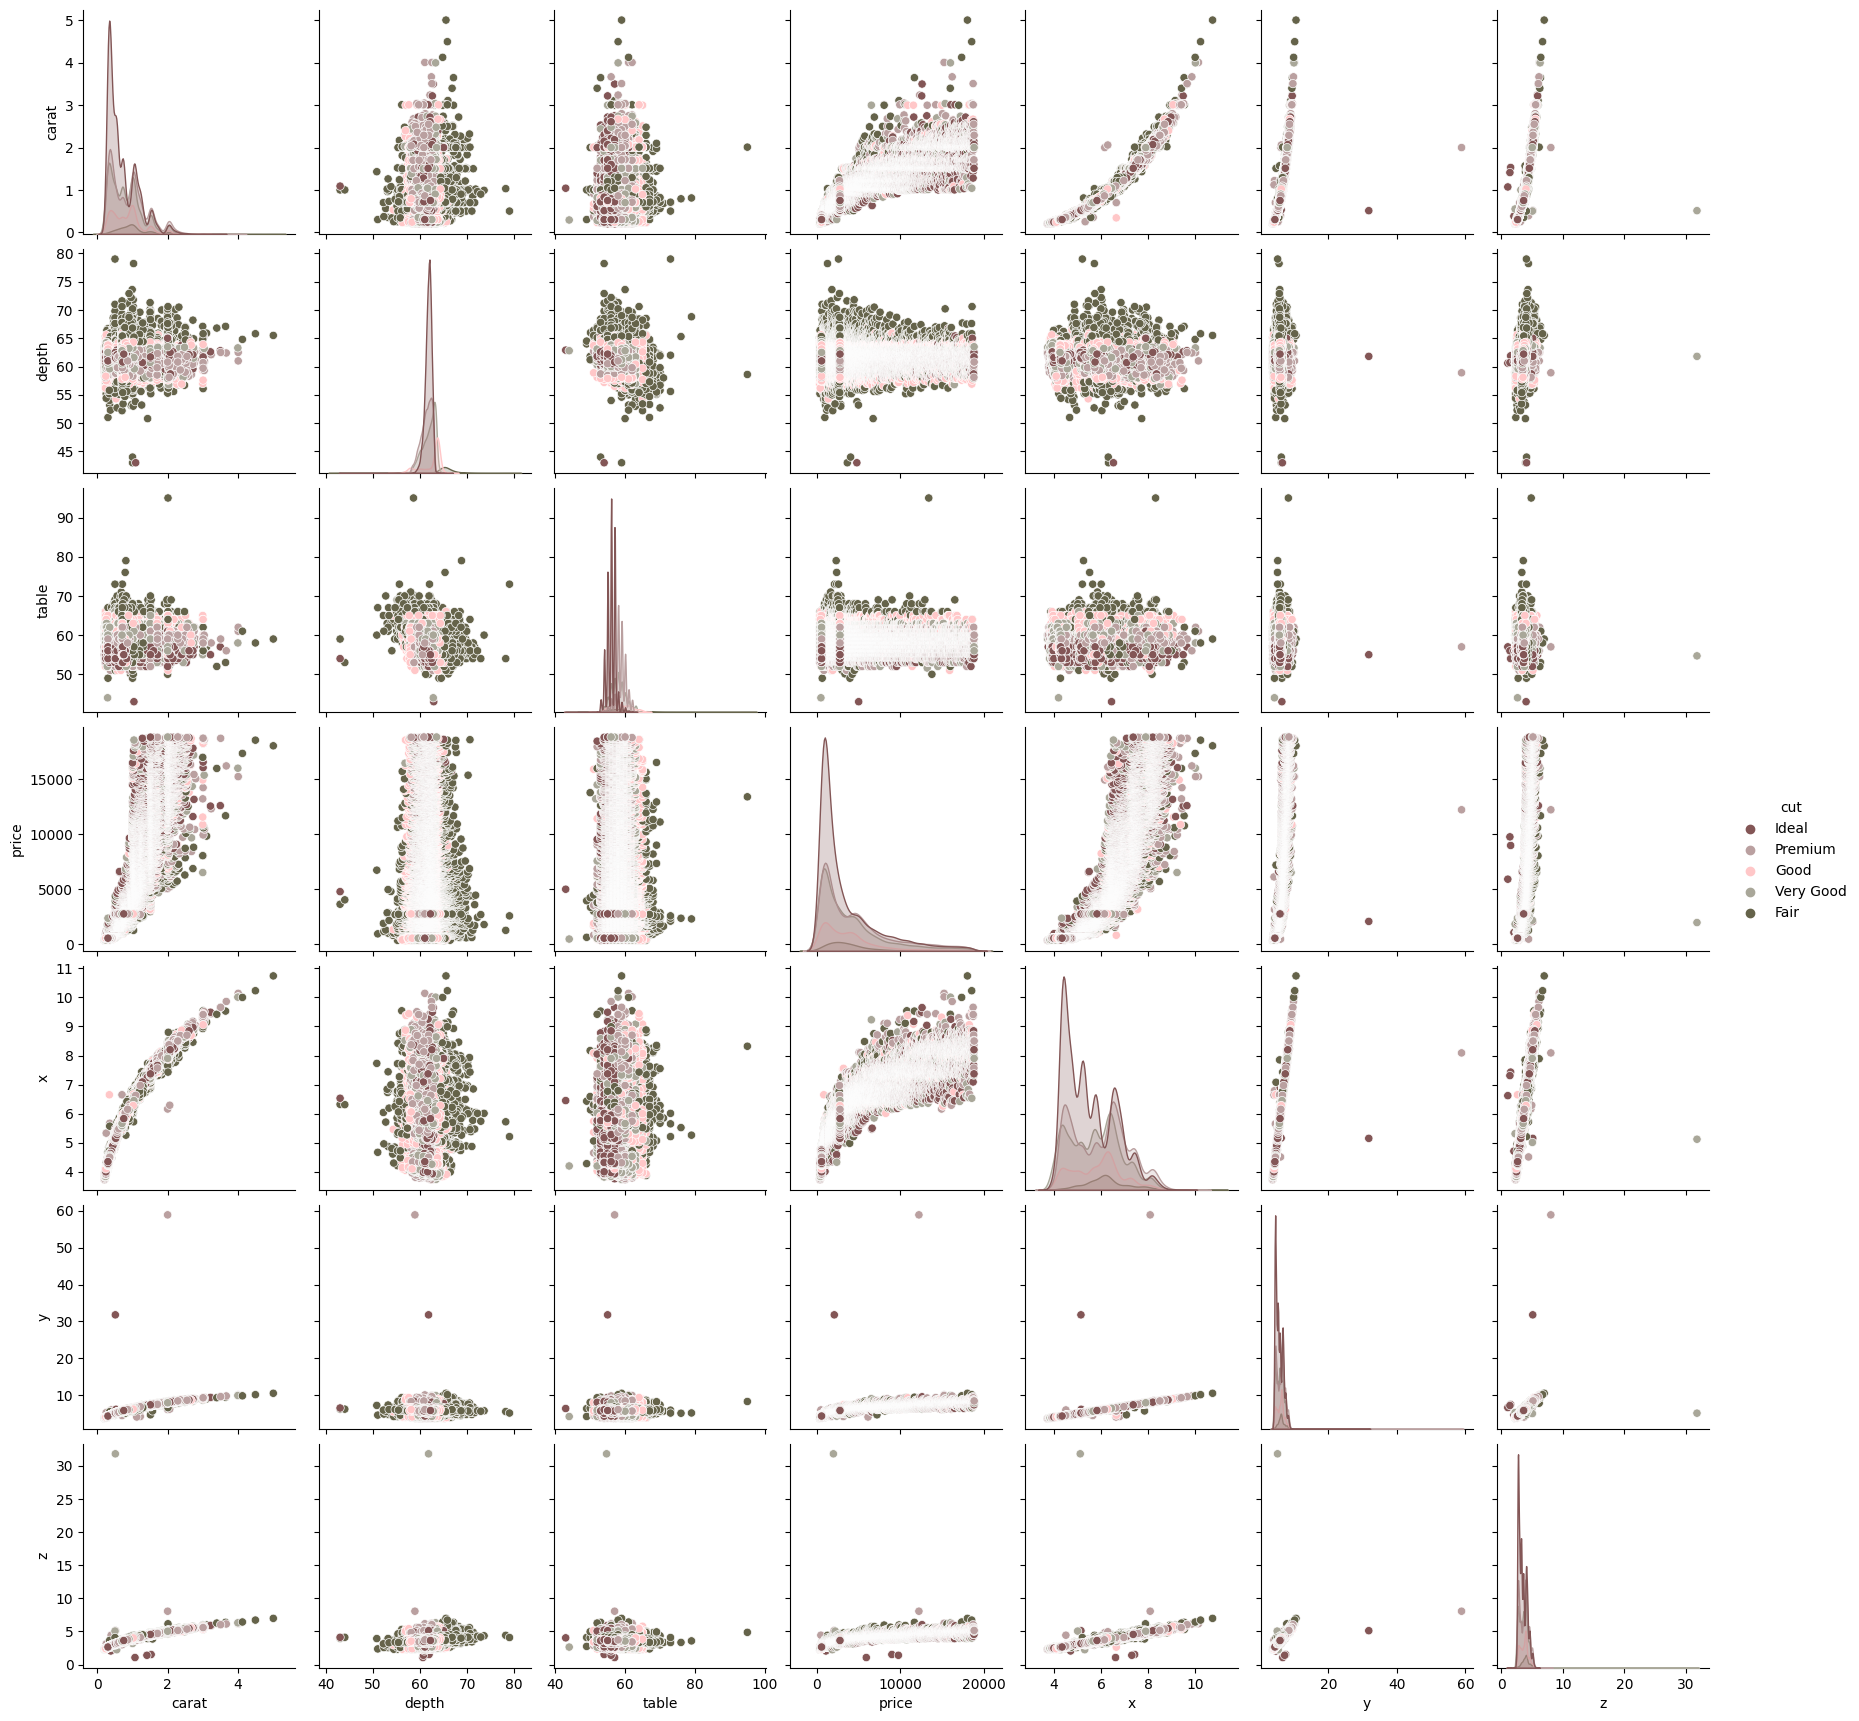

In [14]:
plt.figure(figsize=(20,9))
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]
ax = sns.pairplot(df, hue= "cut",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count. 

In [15]:
# plt.subplots(ncols=2,nrows=1,figsize = (20,7))
# plt.subplot(1,2,1)
# sns.histplot(data=sample_df,x=sample_df['table'],hue=sample_df['price'])
# plt.subplot(1,2,2)
# sns.histplot(data=sample_df,x=sample_df['depth'],hue=sample_df['price'])

In [16]:
# fig, axs = plt.subplots(1, 2, figsize=(15, 7))
# plt.subplot(121)
# sns.histplot(data=df,x='table',bins=30,kde=True,color='g')
# plt.subplot(122)
# sns.histplot(data=df,x='depth',kde=True,hue='price')
# plt.show()
print('this all taking too much time I dont know why............')

this all taking too much time I dont know why............


# Data encoding